In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Khám phá dataset Google Play Store Apps
#### lấy mẫu 300k từ dataset hơn 2 triệu apps
https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

In [201]:
df = pd.read_csv('Google-Playstore-Apps-300k.csv',parse_dates=True)
print(df.shape)
print(df.columns)
df.head(5)

(300000, 24)
Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,be.MOBILISED,com.hastobe.bemobilised,Maps & Navigation,0.0,0.0,100+,100.0,274,True,0.0,...,http://www.has-to-be.com,support@has-to-be.com,"Feb 9, 2020","May 14, 2021",Everyone,https://has-to-be.com/de/ueber-uns/datenschutz...,False,False,False,2021-06-15 20:19:36
1,OTENTIK Discovery FR,com.camineo.otentikdiscoveryDLFR,Travel & Local,3.4,5.0,500+,500.0,949,True,0.0,...,http://www.hotels-attitude.com,info@hotels-attitude.com,"Nov 28, 2016","Oct 30, 2019",Everyone,http://camineo.com/w7WEW99wBsdTH2FuyOeTQACM6mc...,False,False,False,2021-06-15 20:19:36
2,Nepali Congress,np.com.NepaliCongress,Social,0.0,0.0,100+,100.0,336,True,0.0,...,https://nepalicongress.org,info@nepalicongress.org,"May 31, 2021","May 31, 2021",Everyone,https://nepalicongress.org/page/privacy-policy,False,False,False,2021-06-15 20:19:36
3,CUBIC RUNNER,jp.ga_software.cubicrunner,Arcade,0.0,0.0,"1,000+",1000.0,1068,True,0.0,...,http://ga-software.blogspot.jp/,gasoftwarejp@gmail.com,"Apr 1, 2015","Apr 16, 2015",Everyone,NaN,True,True,False,2021-06-15 20:19:37
4,Creepy Story,com.creepypasta.club,Entertainment,0.0,0.0,10+,10.0,22,True,0.0,...,NaN,andizulmai@gmail.com,"May 28, 2019","May 30, 2019",Teen,http://hidayah.club/creepystory_privacy_policy...,True,False,False,2021-06-15 20:19:37


### Chọn các cols cần thiết cho phân tích

In [202]:
data = df[["App Name", "Category", "Rating", "Rating Count","Minimum Installs","Maximum Installs", "Free","Price","Size","Released"]]
data.head(3)


,App Name,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Size,Released
0,be.MOBILISED,Maps & Navigation,0.0,0.0,100.0,274,True,0.0,15M,"Feb 9, 2020"
1,OTENTIK Discovery FR,Travel & Local,3.4,5.0,500.0,949,True,0.0,2.9M,"Nov 28, 2016"
2,Nepali Congress,Social,0.0,0.0,100.0,336,True,0.0,24M,"May 31, 2021"


### Check sơ lượt dataset


In [203]:
print(data.shape)
print(data.info())

(300000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          299999 non-null  object 
 1   Category          300000 non-null  object 
 2   Rating            297032 non-null  float64
 3   Rating Count      297032 non-null  float64
 4   Minimum Installs  299983 non-null  float64
 5   Maximum Installs  300000 non-null  int64  
 6   Free              300000 non-null  bool   
 7   Price             300000 non-null  float64
 8   Size              299974 non-null  object 
 9   Released          290654 non-null  object 
dtypes: bool(1), float64(4), int64(1), object(4)
memory usage: 20.9+ MB
None


In [204]:
print(data.describe(include='all'))

           App Name   Category         Rating  Rating Count  Minimum Installs  \
count        299999     300000  297032.000000  2.970320e+05      2.999830e+05   
unique       294629         48            NaN           NaN               NaN   
top     Tic Tac Toe  Education            NaN           NaN               NaN   
freq             47      31129            NaN           NaN               NaN   
mean            NaN        NaN       2.199983  2.206330e+03      1.812697e+05   
std             NaN        NaN       2.106347  6.655720e+04      1.425936e+07   
min             NaN        NaN       0.000000  0.000000e+00      0.000000e+00   
25%             NaN        NaN       0.000000  0.000000e+00      5.000000e+01   
50%             NaN        NaN       2.900000  6.000000e+00      5.000000e+02   
75%             NaN        NaN       4.300000  4.200000e+01      5.000000e+03   
max             NaN        NaN       5.000000  1.429116e+07      5.000000e+09   

        Maximum Installs   

### cleaning data
#### cleaning null

In [205]:
# App Name: drop
data = data.dropna(subset=["App Name"])
# Rating & Rating Count: replace = 0
data[['Rating','Rating Count']] = data[['Rating','Rating Count']].replace(np.nan, 0)
# Minimum Installs: replace = Maximum Installs / 2
data['Minimum Installs'].fillna(data['Maximum Installs']/2, inplace=True)
# Size: replace = '0M'
data['Size'].fillna('0M', inplace=True)
# Released: replace = Last Updated
data['Released'].fillna(df['Last Updated'], inplace=True)

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299999 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          299999 non-null  object 
 1   Category          299999 non-null  object 
 2   Rating            299999 non-null  float64
 3   Rating Count      299999 non-null  float64
 4   Minimum Installs  299999 non-null  float64
 5   Maximum Installs  299999 non-null  int64  
 6   Free              299999 non-null  bool   
 7   Price             299999 non-null  float64
 8   Size              299999 non-null  object 
 9   Released          299999 non-null  object 
dtypes: bool(1), float64(4), int64(1), object(4)
memory usage: 23.2+ MB


#### duplicate

In [207]:
data.loc[data.duplicated()].value_counts()

Series([], dtype: int64)

#### wrong format
check wrong format

In [208]:
## Size
print(data['Size'].apply(lambda x: type(x)).unique())
# => [<class 'str'>]
print(data['Size'].str.slice(-1).value_counts().index.to_list())
# ['M', 'e', 'k', 'G']

[<class 'str'>]
['M', 'e', 'k', 'G']


Xử lý format

In [209]:
# Size
data['Size'] = data['Size'].apply(lambda x: 0 if x == 'Varies with device' 
                                                else float(x[:-1].replace(",", "")) if x[-1] == 'M'
                                                else float(x[:-1].replace(",", ""))*1024 if x[-1] == "G"
                                                else float(x[:-1].replace(",", ""))/1024 if x[-1] == "k"
                                                else 0)

In [210]:
# Released chuyển định dạng datetime
# data['Released'] = data['Released'].apply(lambda x : pd.to_datetime(x)) #1m40s 
data['Released'] = pd.to_datetime(data['Released']) # Jan 1,2019 #40s
# convert 'Rating Count' & 'Minimum Installs' to int64
data['Rating Count'] = data['Rating Count'].astype('int64')
data['Minimum Installs'] = data['Rating Count'].astype('int64')

In [211]:
print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299999 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App Name          299999 non-null  object        
 1   Category          299999 non-null  object        
 2   Rating            299999 non-null  float64       
 3   Rating Count      299999 non-null  int64         
 4   Minimum Installs  299999 non-null  int64         
 5   Maximum Installs  299999 non-null  int64         
 6   Free              299999 non-null  bool          
 7   Price             299999 non-null  float64       
 8   Size              299999 non-null  float64       
 9   Released          299999 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 23.2+ MB
None


,App Name,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Size,Released
0,be.MOBILISED,Maps & Navigation,0.0,0,0,274,True,0.0,15.0,2020-02-09
1,OTENTIK Discovery FR,Travel & Local,3.4,5,5,949,True,0.0,2.9,2016-11-28
2,Nepali Congress,Social,0.0,0,0,336,True,0.0,24.0,2021-05-31
3,CUBIC RUNNER,Arcade,0.0,0,0,1068,True,0.0,16.0,2015-04-01
4,Creepy Story,Entertainment,0.0,0,0,22,True,0.0,6.1,2019-05-28


### Phân tích dữ liệu

Có tổng 48 categories
Danh sách 10 categories phổ biến nhất:
          Categories  Count
0          Education  31129
1      Music & Audio  20036
2              Tools  18950
3           Business  18439
4      Entertainment  17898
5          Lifestyle  15552
6  Books & Reference  15089
7    Personalization  11726
8   Health & Fitness  10994
9       Productivity  10155
----------
Vẽ biểu đồ pie so sánh tỷ lệ:


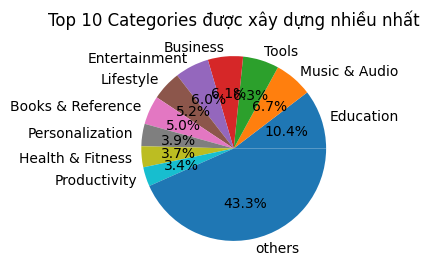

In [212]:
# Có bao nhiêu Categories? xuất ra danh sách top 10 Categories phổ biến nhất.
categories = data['Category'].value_counts().to_frame(name='Count').reset_index().rename(columns={'index': 'Categories'})
categories_count = categories.shape[0]
print(f'Có tổng {categories_count} categories')
print(f'Danh sách 10 categories phổ biến nhất:')
print(categories[:10])

# dùng biểu đồ tròn để biếu diễn tỷ lệ Categories thuộc top 10 với phần còn lại
categories_others = pd.DataFrame({'Categories': ['others'], 'Count': [categories[10:]['Count'].sum()]})
categories_pie = pd.concat([categories[:10],categories_others],ignore_index=True)
print('-'*10)
print('Vẽ biểu đồ pie so sánh tỷ lệ:')
labels = categories_pie['Categories'].to_list()
sizes = categories_pie['Count'].to_list()
fig, ax = plt.subplots(figsize=(6,3))
ax.pie(sizes,labels=labels,autopct='%1.1f%%');
ax.set(title="Top 10 Categories được xây dựng nhiều nhất");


In [213]:
# Tìm danh sách các ứng dụng có ít nhất 1 lần đánh giá, tính trung bình số điểm, phương sai của danh sách đó
data_app_lowest_rating = data.loc[data['Rating Count'] > 0]
print(f'Có {len(data_app_lowest_rating)}/{len(data)} apps được đánh giá')

data_app_lowest_rating_mean = data_app_lowest_rating['Rating'].mean()
print(f'Đạt trung bình: {data_app_lowest_rating_mean : .2f}sao')

data_app_lowest_rating_std = np.std(data_app_lowest_rating['Rating'].to_list())
print(f'Độ lệch chuẩn: {data_app_lowest_rating_std : .2f}')

Có 159343/299999 apps được đánh giá
Đạt trung bình:  4.10sao
Độ lệch chuẩn:  0.69


Tổng số lần đánh giá:  655,350,196 lần
----------
Top 10 apps được đánh giá nhiều nhất:
----------


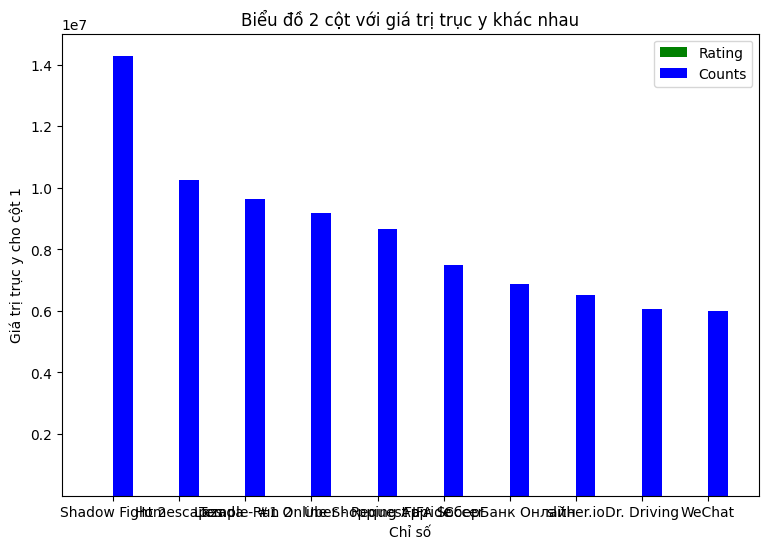

In [214]:
# Tìm tổng số lần đánh giá, lọc ra top 10 apps được đánh giá nhiều nhất.
total_rating_count = data['Rating Count'].sum()
print(f'Tổng số lần đánh giá: {total_rating_count : ,.0f} lần')
print('-'*10)

data_rating_count_sorted = data.sort_values(["Rating Count"],ascending=0)
app_rating_top_10 = data_rating_count_sorted[:10]
print(f'Top 10 apps được đánh giá nhiều nhất:')
app_rating_top_10[['App Name',"Rating","Rating Count"]]

# vẽ bar
print('-'*10)
app_labels = app_rating_top_10["App Name"].to_list()
rating_sizes = app_rating_top_10["Rating"].to_list()
rating_count_sizes = app_rating_top_10["Rating Count"].to_list()

index = np.arange(len(app_labels))
width = 0.3
fig, ax = plt.subplots(figsize=(9,6))
col1 = ax.bar(index, rating_sizes, width,color='green', label = "Rating")
col2 = ax.bar(index+width, rating_count_sizes, width,color='blue', label = "Counts",bottom=rating_sizes)

ax.set_ylabel('Giá trị trục y cho cột 1')
ax.set_xlabel('Chỉ số')
ax.set_title('Biểu đồ 2 cột với giá trị trục y khác nhau')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(app_labels)
ax.legend()

plt.show()
# chưa vẽ được 2 cột liền kề

In [215]:
# tìm ra danh sách 10 apps được cài đặt nhiều nhất và 10 apps ít cài đặt nhất
# install = (Minimum Installs + Maximum Installs)/2
import math
data['Installs'] = (data['Minimum Installs']+data['Maximum Installs']).floordiv(2)
data_installs_sorted = data.sort_values(["Installs","Maximum Installs"],ascending=[0,0])
data_installs_sorted = data_installs_sorted.loc[data_installs_sorted["Installs"] > 0]

app_installs_top_10 = data_installs_sorted[:10]
app_installs_bottom_10 = data_installs_sorted[-10:]

print(f'Top apps được cài nhiều nhất:\n{app_installs_top_10[["App Name","Installs"]]}')
print('-'*10)
print(f'Top apps được cài nhiều nhất:\n{app_installs_bottom_10[["App Name","Installs"]]}')

category_app_installs_top_10 = app_installs_top_10['Category'].unique()
category_app_installs_bottom_10 = app_installs_bottom_10['Category'].unique()


Top apps được cài nhiều nhất:
                                                 App Name    Installs
179291                                       Google Drive  3514452283
33794             Google TV (previously Play Movies & TV)  3079172294
98482   Google Play Books - Ebooks, Audiobooks, and Co...  1602245753
45327                                     Google Calendar  1326703146
287224                                Samsung One UI Home  1079611283
121665                                           Messages   968411754
99551                                  Google Street View   861065702
3149                                        Samsung Email   809014825
37949                                      Samsung Health   671434549
232435                                      YouTube Music   534987373
----------
Top apps được cài nhiều nhất:
                                             App Name  Installs
299527                                  Regulator UPS         1
299543                   Grill 

In [216]:
# Top app được cài đặt nhiều nhất và ít nhất
len_index = len(category_app_installs_top_10) if len(category_app_installs_top_10) > len(category_app_installs_bottom_10) else len(category_app_installs_bottom_10)

df_category_app_installs_top_and_bottom_10 = pd.DataFrame({
    'Top 10': pd.Series(category_app_installs_top_10),
    'Bottom 10': pd.Series(category_app_installs_bottom_10)
},index=np.arange(0,len_index))

print(df_category_app_installs_top_and_bottom_10)

                    Top 10         Bottom 10
0             Productivity          Shopping
1  Video Players & Editors      Food & Drink
2        Books & Reference             Tools
3          Personalization            Sports
4            Communication            Puzzle
5           Travel & Local          Business
6         Health & Fitness         Lifestyle
7            Music & Audio            Arcade
8                      NaN  Health & Fitness
9                      NaN         Education


In [217]:
# Lọc ra loại Category nào, trong top 10 apps được cài đặt nhiều nhất, nhưng không nằm trong top danh sách Categories phổ biến nhất
lst_categories_popular = categories[:10]['Categories'].to_list()
categories_collect = []
for i in category_app_installs_top_10:
    if i not in lst_categories_popular:
        categories_collect.append(i)
        print(i)


Video Players & Editors
Communication
Travel & Local


In [218]:
# Tìm top 10 app miễn phí và app có fee được yêu thích nhất (dựa trên rating và rating count)
apps_free = data.loc[data['Free'] == True]
apps_free_sort = apps_free.sort_values(["Rating","Rating Count"], ascending=[0,0])
apps_fee = data.loc[(data['Free'] == False) & (data['Price'] > 0)]
apps_fee_sort = apps_fee.sort_values(["Rating","Rating Count"], ascending=[0,0])

apps_free_favourite = apps_free_sort[0:10]
apps_fee_favourite = apps_fee_sort[0:10]

df_apps_favourite = pd.DataFrame({
    'Free': apps_free_favourite['App Name'].to_list(),
    'Not Free': apps_fee_favourite['App Name'].to_list()
}, index=np.arange(1,11))

df_apps_favourite

,Free,Not Free
1,STUDiLMU: Your One-stop Solution Learning Partner,DruidCraft Tarot
2,21 Dias de Jejum (Jejum de Daniel),Sneaky Cat Live Wallpaper
3,Angry Crocodile Simulator: Crocodile Attack,ZXReader Donate One
4,Glitch Video Effect - Glitch FX,Tempel Original Cartoon Stickers for Malaysians!
5,올라펫 - 강아지 고양이 반려동물 커뮤니티,DashCards for KLWP
6,Wolf Robot Transforming Games – Robot Car Games,Dark Red - Icon Pack
7,UBER – Vacation Rentals & Real Estate Sales,Dark Tosca - Icon Pack
8,Block Puzzle 2021,Korean Pronunciation
9,TOTALL Touch,pixa
10,极光加速-永久免费VPN 免注册 无限流量 做最好的VPN 科学上网梯子,Stracta for KLWP



      Giá trung bình:  5.48$
      Giá cao nhất:  399.99$
      Giá thấp nhất:  0.21$
      


/tmp/ipykernel_8138/1970493625.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_fee['price_range'] = pd.cut(apps_fee['Price'], bins=bins, labels=labels)


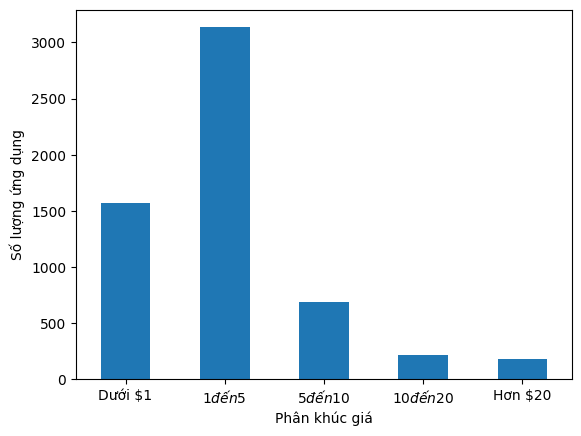

In [219]:
# tính price trung bình của những apps có fee, app nào rẻ nhất, app nào mắc nhất.
apps_fee_mean = apps_fee['Price'].mean()
apps_fee_min = apps_fee['Price'].min()
apps_fee_max = apps_fee['Price'].max()
print(f'''
      Giá trung bình: {apps_fee_mean: .2f}$
      Giá cao nhất: {apps_fee_max: .2f}$
      Giá thấp nhất: {apps_fee_min: .2f}$
      ''')

#vẽ biểu đồ phân khúc giá
bins = [0,1, 5, 10, 20, float('inf')]
labels = ['Dưới $1', '$1 đến $5', '$5 đến $10', '$10 đến $20', 'Hơn $20']
apps_fee['price_range'] = pd.cut(apps_fee['Price'], bins=bins, labels=labels)

counts = apps_fee['price_range'].value_counts().sort_index()
counts.plot(kind='bar', rot=0, xlabel='Phân khúc giá', ylabel='Số lượng ứng dụng');


In [220]:
# kích thước trung bình 1 apps khi được đưa lên google play (loại trừ giá trị: Varies with devices)
size_apps = data.loc[data["Size"] > 0]
size_apps_mean = size_apps['Size'].mean()
size_apps_max = size_apps['Size'].max()

print(f'''
      Kích thước trung bình của 1 app: {size_apps_mean : .2f}Mb
      Kích thước lớn nhất: {size_apps_max : ,.2f}Mb
      ''')


      Kích thước trung bình của 1 app:  19.16Mb
      Kích thước lớn nhất:  1,126.40Mb
      



      Tháng được phát hành nhiều nhất: 2020/05 với 6919 apps
      
Vẽ biểu đồ


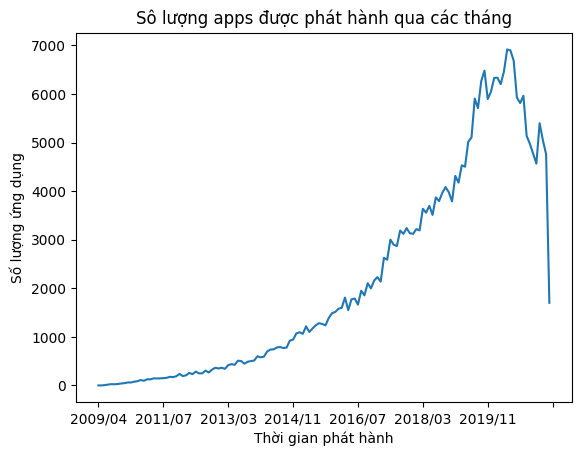

In [221]:
# Tìm tháng nào được phát hành nhiều nhất

data['Released Range'] = data['Released'].dt.strftime('%Y/%m')
apps_per_month = data.groupby('Released Range')['Released Range'].count()

max_month = apps_per_month.idxmax()
max_apps = apps_per_month.max()
print(f'''
      Tháng được phát hành nhiều nhất: {max_month} với {max_apps} apps
      ''')

print('Vẽ biểu đồ')
apps_per_month.plot(xlabel='Thời gian phát hành', ylabel='Số lượng ứng dụng', title='Sô lượng apps được phát hành qua các tháng');
